In [1]:
import pandas as pd
import numpy as np
import itertools

In [2]:
df= pd.read_csv('C_and_O_Bindings_A3B_AA_terminated_Modified.csv')
df

,Element,M-At No.,M-At wt.,M-Density,M-M.P,M-B.P,M-Enth.fus,M-Enth.atom,M-Enth.vap,M-Sp.ht Cap,...,1st Ion E,cova .radii,At.radii,Group,Period,Work F.,Elec.Aff,Carbon_B.E,Oxygen_B.E,Unnamed: 40
0,Ag3Ag,47,107.870,10.490,1234.93,2435,11.3,285,255.0,235.0,...,7.3100,1.45,1.65,11.0,5,4.630,125.6,5.1,2.0,100.0
1,Ag3Cd,47,107.870,10.490,1234.93,2435,11.3,285,255.0,235.0,...,8.6780,1.44,1.61,12.0,5,3.634,0.0,4.9,1.6,NaN
2,Ag3Pd,47,107.870,10.490,1234.93,2435,11.3,285,255.0,235.0,...,8.0440,1.31,1.69,10.0,5,5.470,53.7,3.9,2.1,NaN
3,Ag3Pt,47,107.870,10.490,1234.93,2435,11.3,285,255.0,235.0,...,8.7000,1.36,1.77,10.0,6,5.970,205.3,2.9,1.8,NaN
4,As3As,33,74.900,5.727,1090.00,887,27.7,302,32.4,328.0,...,9.4700,1.19,1.14,15.0,4,4.439,78.0,1.5,-0.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,Co3Ru,27,58.933,8.900,1768.00,3200,16.2,426,375.0,421.0,...,7.1020,1.26,1.78,8.0,5,4.650,101.3,1.4,-0.1,NaN
241,Cu3Rh,29,63.546,8.960,1357.00,2835,13.1,338,300.0,384.4,...,7.1970,1.35,1.73,9.0,5,5.200,109.7,1.2,0.6,NaN
242,Ni3Cu,28,58.693,8.908,1728.00,3186,17.2,431,378.0,445.0,...,7.4550,1.32,1.45,11.0,4,5.090,118.4,1.6,0.2,NaN
243,Pt3Au,78,195.080,21.450,2041.40,4098,20.0,565,490.0,133.0,...,8.9013,1.36,1.74,11.0,6,5.410,222.8,2.2,1.8,NaN


In [3]:
df2=df.iloc[:,1:39]
df2

,M-At No.,M-At wt.,M-Density,M-M.P,M-B.P,M-Enth.fus,M-Enth.atom,M-Enth.vap,M-Sp.ht Cap,M-Elec.-ve,...,Elec.-ve,Surface.E,1st Ion E,cova .radii,At.radii,Group,Period,Work F.,Elec.Aff,Carbon_B.E
0,47,107.870,10.490,1234.93,2435,11.3,285,255.0,235.0,1.93,...,1.93,0.76,7.3100,1.45,1.65,11.0,5,4.630,125.6,5.1
1,47,107.870,10.490,1234.93,2435,11.3,285,255.0,235.0,1.93,...,1.69,0.16,8.6780,1.44,1.61,12.0,5,3.634,0.0,4.9
2,47,107.870,10.490,1234.93,2435,11.3,285,255.0,235.0,1.93,...,2.20,1.36,8.0440,1.31,1.69,10.0,5,5.470,53.7,3.9
3,47,107.870,10.490,1234.93,2435,11.3,285,255.0,235.0,1.93,...,2.28,1.49,8.7000,1.36,1.77,10.0,6,5.970,205.3,2.9
4,33,74.900,5.727,1090.00,887,27.7,302,32.4,328.0,2.18,...,2.18,0.09,9.4700,1.19,1.14,15.0,4,4.439,78.0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,27,58.933,8.900,1768.00,3200,16.2,426,375.0,421.0,1.88,...,2.20,2.60,7.1020,1.26,1.78,8.0,5,4.650,101.3,1.4
241,29,63.546,8.960,1357.00,2835,13.1,338,300.0,384.4,1.90,...,2.28,1.98,7.1970,1.35,1.73,9.0,5,5.200,109.7,1.2
242,28,58.693,8.908,1728.00,3186,17.2,431,378.0,445.0,1.91,...,1.90,1.34,7.4550,1.32,1.45,11.0,4,5.090,118.4,1.6
243,78,195.080,21.450,2041.40,4098,20.0,565,490.0,133.0,2.28,...,2.54,0.74,8.9013,1.36,1.74,11.0,6,5.410,222.8,2.2


In [4]:
print(df2.columns.tolist())

['M-At No.', 'M-At wt.', 'M-Density', 'M-M.P', 'M-B.P', 'M-Enth.fus', 'M-Enth.atom', 'M-Enth.vap', 'M-Sp.ht Cap', 'M-Elec.-ve', 'M-Surface.E', 'M-1st Ion E', 'M-cova .radii', 'M-At.radii', 'M-Group', 'M-Period', 'M-Work F.', 'M-Elec.Aff', 'Ele', 'At No.', 'At wt.', 'Density', 'M.P', 'B.P', 'Enth.fus', 'Enth.atom', 'Enth.vap', 'Sp.ht Cap', 'Elec.-ve', 'Surface.E', '1st Ion E', 'cova .radii', 'At.radii', 'Group', 'Period', 'Work F.', 'Elec.Aff', 'Carbon_B.E']


In [5]:
X= df2
y= df['Carbon_B.E']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((171, 38), (74, 38))

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df3 = df2.drop(labels=["Carbon_B.E","Ele",'M-Enth.atom','M-Work F.', 'M-Elec.Aff',
                         'Enth.vap', 'Sp.ht Cap','M-At No.','M-Density','At No.', 'At wt.','Period','M-Period',
                      ], axis=1)
df3

,M-At wt.,M-M.P,M-B.P,M-Enth.fus,M-Enth.vap,M-Sp.ht Cap,M-Elec.-ve,M-Surface.E,M-1st Ion E,M-cova .radii,...,Enth.fus,Enth.atom,Elec.-ve,Surface.E,1st Ion E,cova .radii,At.radii,Group,Work F.,Elec.Aff
0,107.870,1234.93,2435,11.3,255.0,235.0,1.93,0.76,7.310,1.45,...,11.3,285,1.93,0.76,7.3100,1.45,1.65,11.0,4.630,125.6
1,107.870,1234.93,2435,11.3,255.0,235.0,1.93,0.76,7.310,1.45,...,6.3,112,1.69,0.16,8.6780,1.44,1.61,12.0,3.634,0.0
2,107.870,1234.93,2435,11.3,255.0,235.0,1.93,0.76,7.310,1.45,...,16.7,377,2.20,1.36,8.0440,1.31,1.69,10.0,5.470,53.7
3,107.870,1234.93,2435,11.3,255.0,235.0,1.93,0.76,7.310,1.45,...,20.0,565,2.28,1.49,8.7000,1.36,1.77,10.0,5.970,205.3
4,74.900,1090.00,887,27.7,32.4,328.0,2.18,0.09,9.470,1.19,...,27.7,302,2.18,0.09,9.4700,1.19,1.14,15.0,4.439,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,58.933,1768.00,3200,16.2,375.0,421.0,1.88,2.11,7.604,1.26,...,25.7,652,2.20,2.60,7.1020,1.26,1.78,8.0,4.650,101.3
241,63.546,1357.00,2835,13.1,300.0,384.4,1.90,1.34,7.455,1.32,...,21.7,556,2.28,1.98,7.1970,1.35,1.73,9.0,5.200,109.7
242,58.693,1728.00,3186,17.2,378.0,445.0,1.91,1.92,7.371,1.21,...,13.1,338,1.90,1.34,7.4550,1.32,1.45,11.0,5.090,118.4
243,195.080,2041.40,4098,20.0,490.0,133.0,2.28,1.49,8.700,1.36,...,12.5,368,2.54,0.74,8.9013,1.36,1.74,11.0,5.410,222.8


In [9]:
print(df3.columns.tolist())

['M-At wt.', 'M-M.P', 'M-B.P', 'M-Enth.fus', 'M-Enth.vap', 'M-Sp.ht Cap', 'M-Elec.-ve', 'M-Surface.E', 'M-1st Ion E', 'M-cova .radii', 'M-At.radii', 'M-Group', 'Density', 'M.P', 'B.P', 'Enth.fus', 'Enth.atom', 'Elec.-ve', 'Surface.E', '1st Ion E', 'cova .radii', 'At.radii', 'Group', 'Work F.', 'Elec.Aff']


In [10]:
X= df3
y= df['Carbon_B.E']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

X_train.shape, X_test.shape

((196, 25), (49, 25))

In [12]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
print("r2 on test data is",   r2_score(y_test, y_predict))

r2 on test data is 0.8918320939722997


In [13]:
print("RMSE:"+str(np.sqrt(mean_squared_error(y_test, y_predict))))

RMSE:0.3970645310350559


selected_feature_list = ['M-1st Ion E', 'M-cova .radii','M-Period','cova .radii', 'Period']

# Define the 26 features that remain unchanged
fixed_features = ['M-At wt.', 'M-M.P', 'M-B.P', 'M-Enth.fus', 'M-Enth.vap', 'M-Sp.ht Cap', 'M-Elec.-ve', 'M-Surface.E', 'M-At.radii', 'M-Group', 'Density', 'M.P', 'B.P', 'Enth.fus', 'Enth.atom', 'Elec.-ve', 'Surface.E', '1st Ion E', 'At.radii', 'Group', 'Work F.', 'Elec.Aff']

# Load dataset (Assuming df is already defined)
y = df['Carbon_B.E']

best_rmse = float('inf')
best_features = None

total_iterations = sum(1 for r in range(1, len(selected_feature_list) + 1) for _ in itertools.combinations(selected_feature_list, r))
current_iteration = 0

# Loop over all possible subsets of the 10 selected features
for r in range(1, len(selected_feature_list) + 1):
    for subset in itertools.combinations(selected_feature_list, r):
        current_iteration += 1
        print(f"Iteration {current_iteration}/{total_iterations}: Testing features {subset}")
        
        varying_features = list(subset)
        X = df[fixed_features + varying_features]  # Keep the 26 fixed features
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        
        # Train XGB Regressor
        model = XGBRegressor()
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f"RMSE: {rmse}\n")
        
        # Check if this is the best RMSE so far
        if rmse < best_rmse:
            best_rmse = rmse
            best_features = varying_features

print(f"Best RMSE: {best_rmse}")
print(f"Best Feature Set: {best_features}")


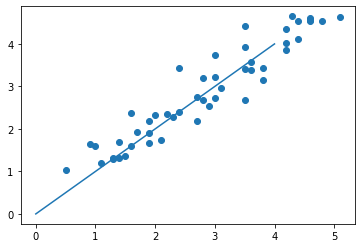

In [14]:
plt.scatter(y_test, y_predict)
plt.plot([0,4], [0,4],)

df_pred = pd.read_csv('Carbon_binding_predictions_Cu_and_Ni_based_bimetallics_A3B_AA.csv')
df_pred

x = df_pred.drop(labels=["Element","Carbon_B.E","M-Enth.atom","M-Enth.vap","Enth.atom","Enth.vap"], axis=1)
x

In [15]:
#PCA_df_Cu_pred = pd.read_csv('PCA_add_Cu_Pred.csv')
#PCA_df_Cu_pred

In [16]:
#combined_df_Cu_pred = pd.concat([x, PCA_df_Cu_pred], axis=1)
#df_Cu_pred = combined_df_Cu_pred
#df_Cu_pred

model.predict(x)

In [17]:
H_params = model.get_params()
H_params

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

p = model.predict(x)
p = pd.DataFrame(p)
p

output_file_CO = 'output_data_CO.xlsx'
p.to_excel(output_file_CO, index=False)
print(f"Data frame converted and saved to '{output_file_CO}'.")

[5.3261537e-03 9.9949157e-03 3.5844103e-03 1.4889003e-01 1.4648801e-03
 1.7293135e-03 2.9158718e-03 4.7385377e-01 1.6896619e-03 1.5962398e-02
 3.0763154e-03 4.9409962e-05 2.3381938e-03 1.1867752e-02 3.5682968e-03
 1.3261316e-03 8.9530580e-02 1.7170468e-02 1.2073067e-01 8.4461058e-03
 3.8539898e-03 1.2671479e-02 3.4790773e-02 1.9597847e-02 5.5706115e-03]


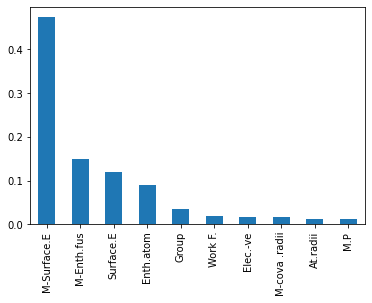

In [18]:
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

!pip install scikit-learn==1.3.0
!pip install xgboost==1.7.6

In [19]:
from scipy.stats import uniform, randint
from sklearn.linear_model import Lasso
from scipy.stats.qmc import Sobol

In [20]:
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
import xgboost as xgb

params = { 'max_depth': np.arange(10,15,1),                     #13
           'learning_rate': np.arange(0.01,0.03, 0.005),      #0.325
           #'subsample': np.arange(0.7, 1, 0.01), 
           'min_child_weight': np.arange(8,12, 1),
           #'colsample_bytree': np.arange(0.99, 1, 0.01),        
           #'colsample_bylevel': np.arange(0.99, 1, 0.01),       
           'n_estimators': np.arange(600,1000,25),                #450
           #'reg_alpha': uniform(1,3),                     #0.8612124738904751
           #'reg_lambda': uniform(1,10),                 #115.01455430429743  
         }
sobol_sequence = Sobol(1)
lasso = Lasso()
# number of times random search is run
n = 50                                             # n=20    #n_iter=50  #cv=10

In [21]:
xgbr = xgb.XGBRegressor(seed=20)
average = np.array([0]*25, dtype=np.float64)
feature_importances = []

nth_run = 1
rmse_values_test = []
rmse_values_train = []
avg = 0

for i in range(n):   
    clf = RandomizedSearchCV(estimator=xgbr,
                             param_distributions=params,
                             scoring='neg_mean_squared_error',
                             n_iter=30,cv=10,random_state=np.random.RandomState(int(sobol_sequence.random(1)[0] * 2**31)),
                             verbose=1)
    clf.fit(X_train,y_train)
    
    print(f"Run {i + 1}: Best Estimator: {clf.best_estimator_}")
    
    if (i + 1) % nth_run == 0:
        # Predictions on test set
        y_pred_test = clf.predict(X_test)
        mse_test = mean_squared_error(y_test, y_pred_test)
        rmse_test = np.sqrt(mse_test)
        rmse_values_test.append(rmse_test)
        
        # Predictions on training set
        y_pred_train = clf.predict(X_train)
        mse_train = mean_squared_error(y_train, y_pred_train)
        rmse_train = np.sqrt(mse_train)
        rmse_values_train.append(rmse_train)

        print(f"RMSE for every {nth_run}th run - Training: {rmse_train}, Test: {rmse_test}")
        nth_run += 1
    
    average += clf.best_estimator_.feature_importances_
    feature_importances.append(clf.best_estimator_.feature_importances_)
average = average/n
avg = avg/n

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Run 1: Best Estimator: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.024999999999999998,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=14, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             n_estimators=850, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
RMSE for every 1th run - Training: 0.055663824111231296, Test: 0.4274422822072839
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Run 2: Best Esti

Run 10: Best Estimator: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.024999999999999998,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             n_estimators=850, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
RMSE for every 10th run - Training: 0.05433636527811815, Test: 0.4242358323136875
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Run 11: Best Estimator: XGBRegressor(base_score=None, booster=None, callbacks=

Run 19: Best Estimator: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.019999999999999997,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
RMSE for every 19th run - Training: 0.07145806477496135, Test: 0.41910338054557933
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Run 20: Best Estimator: XGBRegressor(base_score=None, booster=None, callbacks

Run 28: Best Estimator: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.024999999999999998,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             n_estimators=725, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
RMSE for every 28th run - Training: 0.06815624695820832, Test: 0.42527074133054954
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Run 29: Best Estimator: XGBRegressor(base_score=None, booster=None, callbacks

Run 37: Best Estimator: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.024999999999999998,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=13, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             n_estimators=600, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
RMSE for every 37th run - Training: 0.0867237135299889, Test: 0.4309062473939612
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Run 38: Best Estimator: XGBRegressor(base_score=None, booster=None, callbacks=N

Run 46: Best Estimator: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.024999999999999998,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             n_estimators=800, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
RMSE for every 46th run - Training: 0.06010548986895953, Test: 0.42940321669506193
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Run 47: Best Estimator: XGBRegressor(base_score=None, booster=None, callbacks

In [34]:
avg

0.0

In [35]:
np.min(rmse_values_test), np.max(rmse_values_test)

(0.4131372357594616, 0.4309062473939612)

In [36]:
np.min(rmse_values_train), np.max(rmse_values_train)

(0.0453113963248301, 0.10084737234578903)

In [37]:
mean_rmse_test = np.mean(rmse_values_test)
print(f"Mean RMSE: {mean_rmse_test}")

Mean RMSE: 0.4246558992904936


In [38]:
mean_rmse_train = np.mean(rmse_values_train)
print(f"Mean RMSE: {mean_rmse_train}")

Mean RMSE: 0.06368543523933498


([<matplotlib.axis.XTick at 0x1c5d33fde20>,
 [Text(0, 0, 'M-At wt.'),
  Text(1, 0, 'M-M.P'),
  Text(2, 0, 'M-B.P'),
  Text(3, 0, 'M-Enth.fus'),
  Text(4, 0, 'M-Enth.vap'),
  Text(5, 0, 'M-Sp.ht Cap'),
  Text(6, 0, 'M-Elec.-ve'),
  Text(7, 0, 'M-Surface.E'),
  Text(8, 0, 'M-1st Ion E'),
  Text(9, 0, 'M-cova .radii'),
  Text(10, 0, 'M-At.radii'),
  Text(11, 0, 'M-Group'),
  Text(12, 0, 'Density'),
  Text(13, 0, 'M.P'),
  Text(14, 0, 'B.P'),
  Text(15, 0, 'Enth.fus'),
  Text(16, 0, 'Enth.atom'),
  Text(17, 0, 'Elec.-ve'),
  Text(18, 0, 'Surface.E'),
  Text(19, 0, '1st Ion E'),
  Text(20, 0, 'cova .radii'),
  Text(21, 0, 'At.radii'),
  Text(22, 0, 'Group'),
  Text(23, 0, 'Work F.'),
  Text(24, 0, 'Elec.Aff')])

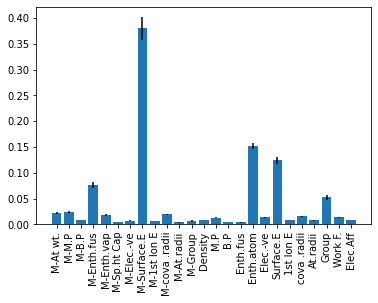

In [27]:
plt.bar(x=range(25), height=np.mean(feature_importances, axis=0), yerr=np.std(feature_importances, axis=0))
plt.xticks(ticks = range(25),labels=X_train.columns, rotation=90)


In [29]:
print("neg-MSE:", clf.best_score_)

neg-MSE: -0.23119309693282805


In [30]:
y_pred = clf.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

rmse    

0.4131372357594616